<a href="https://colab.research.google.com/github/KharismadinaHM/Darth-urany/blob/master/M5_Data_Cleansing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum V

Selamat datang pada praktikum unggulan minggu ke - 5. 


![1_L0464qoX7pSkIQMBcF73Tg.png](attachment:1_L0464qoX7pSkIQMBcF73Tg.png)

Gambar diatas menunjukkan tahapan yang Anda perlu lakukan ketika ingin membangun sebuah model artificial intelligence. 
Pada minggu ini Anda akan melakukan fase data cleansing atau pembersihan data. Tahapan ini biasanya dilakuakan sebelum anda melakukan tahapan EDA yang telah Anda pelajari sebelumnya. Tahapan ini perlu dilakukan jika data yang Anda miliki tidak 'bersih', sehingga perlu dilakukan pemrosesan terlebih dahulu (tahapan pre-processing) sebelum data tersebut masuk kedalam algoritma pembangunan model. 

Materi praktikum ini dibagi menjadi 2 bagian dengan menggunakan dua dataset yang berbeda. Adapun operasi akan Anda lakukan antara lain 
* Melihat bentuk data (shape) dari data train dan test set
* Cek data NaN, bila ada maka hapus/drop data NaN tsb
* Cek outliers, bila ada maka hapus/drop outliers tsb
* Melakukan konversi jenis kolom yang relevan.
* Melakukan transformasi terhadap data yang bersifat kategori 

Operasi yang Anda lakukan pada tahapan pembersihan data sangat bergantung pada karakteristik permasalahan, karakter data, serta jenis data yang terdapat dalam dataset Anda. Sebagai referensi, berikut bagan dari berbagai macam tipe data yang mungkin Anda temui dalam sebuah dataset. 




![8UUywzzaMhY2ZGHrWE7VkA_b.png](attachment:8UUywzzaMhY2ZGHrWE7VkA_b.png)

In [1]:
import numpy as np 
import pandas as pd 
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset 1

Dataset yang akan Anda gunakan pada praktikum kali ini adalah dataset transaksi taksi di kota New York. Dataset ini memiliki jumlah sebanyak 200.000 data dengan 8 fitur. 

In [ ]:
# Load data train dan test ke dalam pandas dataframe
# train = pd.read_csv("../input/train.csv", nrows = 1000000) # kita hanya gunakan 1 juta baris data
train = pd.read_csv("https://raw.githubusercontent.com/supasonicx/ATA-praktikum-01/main/Split-200000.csv")

## BAGIAN 1 : DATA CLEANSING PENGHILANGAN MISSING VALUE DAN DATA ANOMALI**

Pada bagian ini, Anda akan mempraktikan cara untuk :
* Melihat bentuk data (shape) dari data train dan test set
* Cek data NaN, bila ada maka hapus/drop data NaN tsb
* Cek outliers, bila ada maka hapus/drop outliers tsb
* Melakukan konversi jenis kolom yang relevan.



In [ ]:
# menghasilkan jumlah baris dan jumlah kolom (bentuk data) pada data train dengan fungsi .shape
train.shape

(200000, 8)

In [ ]:
# menampilkan 10 data teratas
train.head(10)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [ ]:
# fungsi describe() untuk mengetahui statistika data untuk data numeric seperti count, mean, standard deviation, maximum, mininum, dan quartile.
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.342877,-72.506121,39.922326,-72.518673,39.925579,1.682445
std,9.837855,11.608097,10.048947,10.724226,6.751120,1.306730
min,-44.900000,-736.550000,-3116.285383,-1251.195890,-1189.615440,0.000000
25%,6.000000,-73.992050,40.735007,-73.991295,40.734092,1.000000
50%,8.500000,-73.981743,40.752761,-73.980072,40.753225,1.000000
75%,12.500000,-73.967068,40.767127,-73.963508,40.768070,2.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000


In [ ]:
#cek nilai yang hilang / missing values di dalam data train
train.isnull().sum().sort_values(ascending=False)

dropoff_latitude     1
dropoff_longitude    1
passenger_count      0
pickup_latitude      0
pickup_longitude     0
pickup_datetime      0
fare_amount          0
key                  0
dtype: int64

Missing values adalah nilai yang tidak terdefinisi di dataset. Bentuknya beragam, bisa berupa blank cell, ataupun simbol-simbol tertentu seperti NaN (Not a Number), NA (Not Available), ?, -, dan sebagainya. Missing values dapat menjadi masalah dalam analisis data serta tentunya dapat mempengaruhi hasil modelling machine learning. **Dari hasil diatas data train mengandung 10 data missing values pada kolom/field dropoff_latitude dan dropoff_longitude.**

Dari hasil diatas data test ternyata tidak memiliki missing values

In [ ]:
#drop/hapus data missing values
train = train.drop(train[train.isnull().any(1)].index, axis = 0)

In [ ]:
train.shape

(199999, 8)

Diatas dapat terlihat hasil dimensi/shape data setelah drop/hapus missing values

**Melakukan pemeriksaan dan membersihkan data yang dinilai 'anomali' setiap kolom pada data train:**
1. fare_amount
2. passanger_count
3. pickup_longitude
4. pickup_latitude
5. dropoff_longitude 
6. dropoff_latitude

In [ ]:
# periksa kolom target yaitu kolom fare_amount
train['fare_amount'].describe()

count    199999.000000
mean         11.342871
std           9.837879
min         -44.900000
25%           6.000000
50%           8.500000
75%          12.500000
max         500.000000
Name: fare_amount, dtype: float64

data target adalah fitur dari dataset yang ingin Anda pahami lebih dalam.
**Dari output diatas**, kolom target Fare amount/jumlah tarif memiliki nilai negatif, yang tidak masuk akal. Dan kita Hapus kolom ini.

In [ ]:
# Seleksi nilai negatif tsb, dan menghasilkan 38 kolom fare_amount memiliki nilai negatif 
from collections import Counter
Counter(train['fare_amount']<0)

Counter({False: 199986, True: 13})

In [ ]:
# Hapus nilai negatif kemudian cek dimensi data dengan fungsi .shape
train = train.drop(train[train['fare_amount']<0].index, axis=0)
train.shape

(199986, 8)

In [ ]:
# dan terlihat pada output tidak ada lagi nilai negatif pada kolom fare_amount
train['fare_amount'].describe()

count    199986.000000
mean         11.344032
std           9.836736
min           0.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         500.000000
Name: fare_amount, dtype: float64

In [ ]:
# terlihat pada output jumlah tarif tertiggi adalah $500
train['fare_amount'].sort_values(ascending=False)

101885    500.00
130460    281.05
142550    255.00
149769    240.00
168218    235.00
           ...  
27891       0.00
105051      0.00
175352      0.00
10002       0.00
47302       0.00
Name: fare_amount, Length: 199986, dtype: float64

**Selanjutnya periksa kolom passenger_count**

In [ ]:
train['passenger_count'].describe()

count    199986.000000
mean          1.682423
std           1.306692
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: passenger_count, dtype: float64

In [ ]:
# Misal asumsi, menurut aturan batas maksimum penumpang dalam sebuah taksi adalah 6
# ini PASTI outlier. Mari kita drop/hapus
train[train['passenger_count']>6]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [ ]:
# jauh lebih rapi sekarang! Jumlah penumpang maksimal adalah 6.
train['passenger_count'].describe()

count    199986.000000
mean          1.682423
std           1.306692
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: passenger_count, dtype: float64

**Selanjutnya periksa kolom pickup_latitude dan pickup_longitudes**

In [ ]:
# mari kita eksplore kolom pickup latitude dan longitudes
train['pickup_latitude'].describe()

count    199986.000000
mean         39.922268
std          10.049296
min       -3116.285383
25%          40.735006
50%          40.752761
75%          40.767126
max        1703.092772
Name: pickup_latitude, dtype: float64

* Garis lintang berkisar dari -90 hingga 90.
* Garis bujur berkisar dari -180 hingga 180.

Uraian di atas dengan jelas menunjukkan beberapa outlier. Mari kita saring mereka

In [ ]:
train[train['pickup_latitude']<-90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
150559,2012-08-03 07:43:00.000000176,25.3,2012-08-03 07:43:00 UTC,0.0,-3116.285383,-73.9536,40.787998,1


In [ ]:
train[train['pickup_latitude']>90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
5686,2011-07-30 11:15:00.00000082,3.3,2011-07-30 11:15:00 UTC,-73.947235,401.083332,-73.951392,40.778927,1
174356,2011-11-21 21:36:00.00000081,9.7,2011-11-21 21:36:00 UTC,2140.601160,1703.092772,-1251.195890,-1189.615440,1


In [ ]:
# lalu kita hapus data outliers tsb
train = train.drop((train[train['pickup_latitude']<-90]).index|(train[train['pickup_latitude']>90]).index, axis = 0)

In [ ]:
#12 baris terhapus
train.shape

(199983, 8)

In [ ]:
# lakukan operasi yang sama untuk kolom pickup longitude
train['pickup_longitude'].describe()

count    199983.000000
mean        -72.517443
std          10.499589
min        -736.550000
25%         -73.992050
50%         -73.981743
75%         -73.967072
max          40.811147
Name: pickup_longitude, dtype: float64

In [ ]:
# cek data yang bernilai lebih dari -180
train[train['pickup_longitude']<-180]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
60442,2012-01-12 13:36:00.000000186,4.9,2012-01-12 13:36:00 UTC,-736.55,40.73823,-73.988742,40.748847,1


In [ ]:
# cek data yang bernilai lebih dari 180
train[train['pickup_longitude']>180]

In [ ]:
train = train.drop(train[train['pickup_longitude']<-180].index, axis = 0)

**Selanjutnya periksa kolom dropoff_latitude dan dropoff_longitudes**

In [ ]:
#lakukan operasi yang sama untuk kolom dropoff latitude and longitude
# cek data yang bernilai lebih dari -90
train[train['dropoff_latitude']<-90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [ ]:
# cek data yang bernilai lebih dari 90
train[train['dropoff_latitude']>90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
92310,2011-09-27 11:54:00.000000127,28.9,2011-09-27 11:54:00 UTC,-74.014595,40.681880,-73.973310,404.616667,1
181973,2012-01-03 09:04:00.000000130,6.5,2012-01-03 09:04:00 UTC,-74.008918,40.717827,-74.000855,404.133332,1


In [ ]:
# hapus data/outliers tsb 
train = train.drop(train[train['dropoff_latitude']>90].index, axis=0)

In [ ]:
#8 kolom terhapus
train.shape

(199980, 8)

**Periksa tipe data setiap kolom data train**

In [ ]:
train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

key and pickup_datetime tampaknya menjadi kolom datetime yang dalam format objek. Mari kita ubah menjadi datetime:

In [ ]:
train['key'] = pd.to_datetime(train['key'])
train['pickup_datetime']  = pd.to_datetime(train['pickup_datetime'])

In [ ]:
#cek tipe data tsb setelah di konversi
train.dtypes

key                       datetime64[ns]
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [ ]:
#cek data train setelah di cleansing
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


**Data sudah selesai di cleansing, dan selanjutnya siap untuk di masukkan kedalam model machine learning :)**

## BAGIAN 2 : TRANSFORMASI DATA DENGAN TIPE KATEGORI**

Pada bagian ini, Anda akan mempraktikan cara untuk :
* Melakukan transformasi terhadap data yang bersifat kategori 

### Dataset 2

Dataset yang akan Anda gunakan pada bagian ini adalah data sensus penduduk. Dataset ini memiliki jumlah sebanyak 48842 data dengan 15 fitur. 

In [29]:
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

In [30]:
data = pd.read_csv("https://gitlab.com/andreass.bayu/file-directory/-/raw/main/adult.csv", na_values="?" )
print('Number of rows: '+ format(data.shape[0]) +', number of features: '+ format(data.shape[1]))

Number of rows: 48842, number of features: 15


In [31]:
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [32]:
## mengecek apakah terdapat nilai NA pada dataset

C = (data.dtypes == 'object')
CategoricalVariables = list(C[C].index)

Integer = (data.dtypes == 'int64') 
Float   = (data.dtypes == 'float64') 
NumericVariables = list(Integer[Integer].index) + list(Float[Float].index)

Missing_Percentage = (data.isnull().sum()).sum()/np.product(data.shape)*100
print("The number of missing entries before cleaning: " + str(round(Missing_Percentage,5)) + " %")

The number of missing entries before cleaning: 0.88244 %


In [33]:
## menampilkan seluruh list fitur yang ada
list(data.columns)

['age',
 'workclass',
 'fnlwgt',
 'education',
 'educational-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [34]:
data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [35]:
data.education.unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [36]:
data.native-country.unique()

AttributeError: ignored

In [37]:
##melakukan proses rename kolom
dataRename = data.rename(columns={'marital-status': 'maritalStatus'})

In [38]:
dataRename.head(5)

,age,workclass,fnlwgt,education,educational-num,maritalStatus,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [39]:
## Kode untuk melakukan transformasi untuk kolom marital_status dengan fungsi maping

maritalStatus_map  = {'Never-married':0,'Married-civ-spouse':1,'Widowed':2, 'Divorced':3,'Separated':4,'Married-spouse-absent':5,'Married-AF-spouse':6}

dataRename['maritalStatus'] = dataRename['maritalStatus'].map(maritalStatus_map)
dataRename.head()

,age,workclass,fnlwgt,education,educational-num,maritalStatus,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,0,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,1,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,1,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,1,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,0,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [83]:
## Kode untuk melakukan transformasi untuk kolom marital_status dengan fungsi cat.codes
dataRename["race"] = dataRename["race"].astype('category')
dataRename["race_encoded"] = dataRename["race"].cat.codes
dataRename[["race", "race"]].head()

,race,race
0,Black,Black
1,White,White
2,White,White
3,Black,Black
4,White,White


In [41]:
## Kode untuk melakukan transformasi untuk kolom marital_status dengan fungsi Ordinal Encoder dari library sklearn
ord_enc = OrdinalEncoder()
dataRename["gender"] = ord_enc.fit_transform(dataRename[["gender"]])
dataRename[["gender", "gender"]].head(10)

,gender,gender
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,0.0,0.0
5,1.0,1.0
6,1.0,1.0
7,1.0,1.0
8,0.0,0.0
9,1.0,1.0


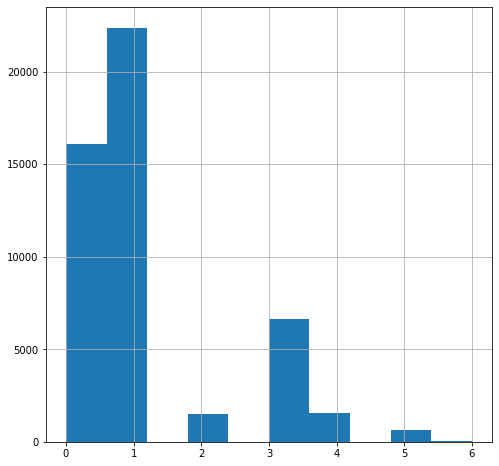

In [42]:
dataRename['maritalStatus'].hist(figsize=(8,8))
plt.show()

In [43]:
dataRename = dataRename.rename(columns={'capital-gain': 'capitalGain'})
dataRename['capitalGain'].describe()

count    48842.000000
mean      1079.067626
std       7452.019058
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capitalGain, dtype: float64

In [44]:
dataRename.head(5)

,age,workclass,fnlwgt,education,educational-num,maritalStatus,occupation,relationship,race,gender,capitalGain,capital-loss,hours-per-week,native-country,income,race_encoded
0,25,Private,226802,11th,7,0,Machine-op-inspct,Own-child,Black,1.0,0,0,40,United-States,<=50K,2
1,38,Private,89814,HS-grad,9,1,Farming-fishing,Husband,White,1.0,0,0,50,United-States,<=50K,4
2,28,Local-gov,336951,Assoc-acdm,12,1,Protective-serv,Husband,White,1.0,0,0,40,United-States,>50K,4
3,44,Private,160323,Some-college,10,1,Machine-op-inspct,Husband,Black,1.0,7688,0,40,United-States,>50K,2
4,18,NaN,103497,Some-college,10,0,NaN,Own-child,White,0.0,0,0,30,United-States,<=50K,4


In [45]:
dataRename.race.unique()

['Black', 'White', 'Asian-Pac-Islander', 'Other', 'Amer-Indian-Eskimo']
Categories (5, object): ['Black', 'White', 'Asian-Pac-Islander', 'Other', 'Amer-Indian-Eskimo']

In [46]:
race1 = dataRename[dataRename["race_encoded"] == 1]
race2 = dataRename[dataRename["race_encoded"] == 2]
race3 = dataRename[dataRename["race_encoded"] == 3]
race4 = dataRename[dataRename["race_encoded"] == 4]
race5 = dataRename[dataRename["race_encoded"] == 5]

In [47]:
race2.dtypes

age                   int64
workclass            object
fnlwgt                int64
education            object
educational-num       int64
maritalStatus         int64
occupation           object
relationship         object
race               category
gender              float64
capitalGain           int64
capital-loss          int64
hours-per-week        int64
native-country       object
income               object
race_encoded           int8
dtype: object

In [48]:
race1.head(10)

,age,workclass,fnlwgt,education,educational-num,maritalStatus,occupation,relationship,race,gender,capitalGain,capital-loss,hours-per-week,native-country,income,race_encoded
19,40,Private,85019,Doctorate,16,1,Prof-specialty,Husband,Asian-Pac-Islander,1.0,0,0,45,NaN,>50K,1
141,18,Private,262118,Some-college,10,0,Adm-clerical,Own-child,Asian-Pac-Islander,0.0,0,0,22,Germany,<=50K,1
220,34,Private,162312,Bachelors,13,1,Adm-clerical,Husband,Asian-Pac-Islander,1.0,0,0,40,Philippines,<=50K,1
221,25,Private,77698,HS-grad,9,0,Machine-op-inspct,Not-in-family,Asian-Pac-Islander,0.0,0,0,40,Philippines,<=50K,1
232,55,Private,119751,Masters,14,0,Exec-managerial,Unmarried,Asian-Pac-Islander,0.0,0,0,50,Thailand,<=50K,1
309,51,Self-emp-not-inc,136708,HS-grad,9,1,Sales,Husband,Asian-Pac-Islander,1.0,3103,0,84,Vietnam,<=50K,1
376,28,Private,302903,Bachelors,13,1,Prof-specialty,Wife,Asian-Pac-Islander,0.0,0,1485,40,United-States,<=50K,1
377,24,Private,154835,HS-grad,9,0,Exec-managerial,Own-child,Asian-Pac-Islander,0.0,0,0,40,South,<=50K,1
395,37,Private,79586,HS-grad,9,4,Machine-op-inspct,Own-child,Asian-Pac-Islander,1.0,0,0,60,United-States,<=50K,1
396,45,Private,355781,Bachelors,13,1,Exec-managerial,Husband,Asian-Pac-Islander,1.0,0,0,45,Japan,>50K,1


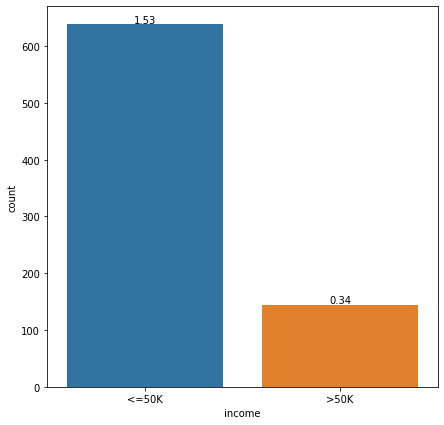

In [49]:
plt.figure(figsize=(7,7))
total = float(len(race4) )

ax = sns.countplot(x="income", data=race4[race4["age"]>70])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

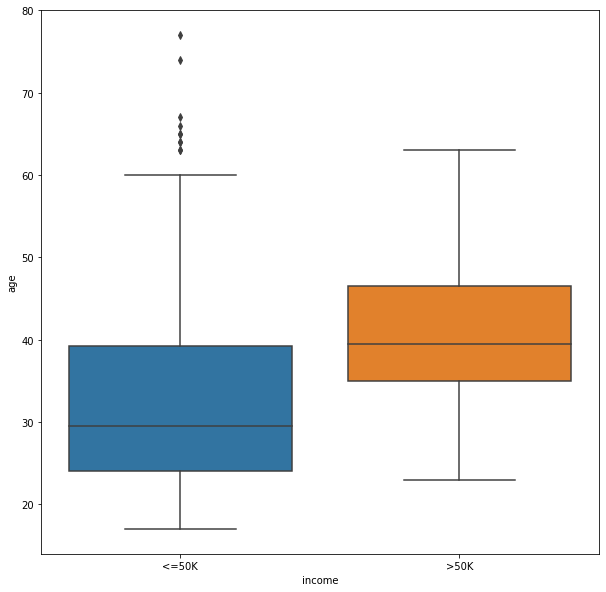

In [50]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="age", data=race3)
plt.show()

### Instruksi Praktikum untuk mahasiswa FIKTI dan FTI (kecuali Teknik Industri, Teknik Mesin dan Agroteknologi)

* Lakukan teknik data cleaning untuk data yang bernilai NaN pada Dataset 2. 
* Lakukan analisis histogram kolom income pada setiap kategori race, apakah yang dapat Anda simpulkan ?
* Ganti kolom hours-per-week dengan nama hoursPerWeek
* Berapa jumlah responden yang bekerja lebih dari 40 jam per minggunya untuk masing-masing kategori race?  

### Instruksi Praktikum mahasiswa Teknik Industri, Teknik Mesin, Agroteknologi, dan FTSP

* Ganti kolom hours-per-week dengan nama hoursPerWeek
* Lakukan analisis histogram pada kolom hoursPerWeek pada setiap data race1, race2, race3, race4 dan race5. Informasi apa yang dapat Anda simpulkan ?
* Terdapat berapa kategori data yang mengisi kolom workclass? Apa saja kategori yang ada?
* Jelaskan hasil boxplot yang diperoleh untuk data income dan umur untuk data race1 !

## Jawab :

### 1. Data Cleansing pada Dataset 2.

In [27]:
#Cek datanya dulu
data.shape

(48842, 15)

In [28]:
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [26]:
data.isnull().sum().sort_values(ascending=False)

occupation         2809
workclass          2799
native-country      857
income                0
hours-per-week        0
capital-loss          0
capital-gain          0
gender                0
race                  0
relationship          0
marital-status        0
educational-num       0
education             0
fnlwgt                0
age                   0
dtype: int64

In [55]:
#Menghapus data yang memiliki NaN
data = data.drop(data[data.isnull().any(1)].index, axis = 0)

In [56]:
#Cek Lagi datanya
data.shape

(45222, 15)

In [57]:
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
11,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K


### 2. Analisis histogram kolom income pada setiap kategori race.

### RACE 1

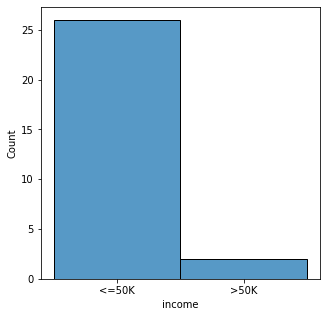

In [75]:
plt.figure(figsize=(5,5))
total = float(len(race1) )

ax = sns.histplot(x="income", data=race1[race1["age"]>70])
plt.show()

### RACE 2

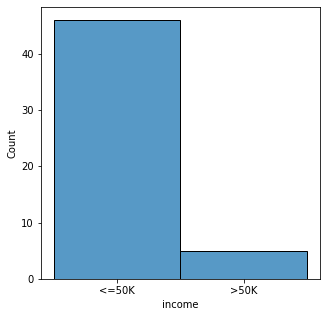

In [74]:
plt.figure(figsize=(5,5))
total = float(len(race2) )

ax = sns.histplot(x="income", data=race2[race2["age"]>70])

plt.show()

### RACE 3

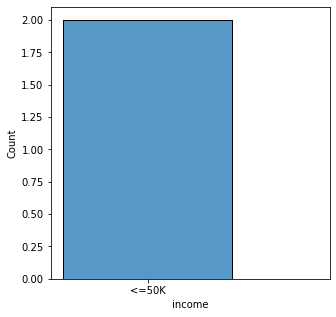

In [73]:
plt.figure(figsize=(5,5))
total = float(len(race3) )

ax = sns.histplot(x="income", data=race3[race3["age"]>70])
 
plt.show()

### RACE 4

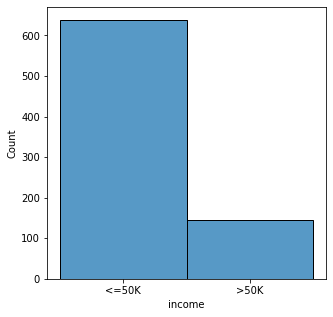

In [79]:
plt.figure(figsize=(5,5))
total = float(len(race4) )

ax = sns.histplot(x="income", data=race4[race4["age"]>70])

plt.show()

#### Jadi dapat dilihat disini bahwwa race 4 lebih banyak memiliki income diatas > 50k dibanding race1, race2, dan race3.

### 3. Ganti Nama kolom 
disini akan mengganti nama kolom hours-per-weer menjadi HoursPerWeeks

In [71]:
dataRename = dataRename.rename(columns={'hours-per-week': 'HoursPerWeeks'})
dataRename['HoursPerWeeks'].describe()

count    48842.000000
mean        40.422382
std         12.391444
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: HoursPerWeeks, dtype: float64

### 4. Jumlah Responden

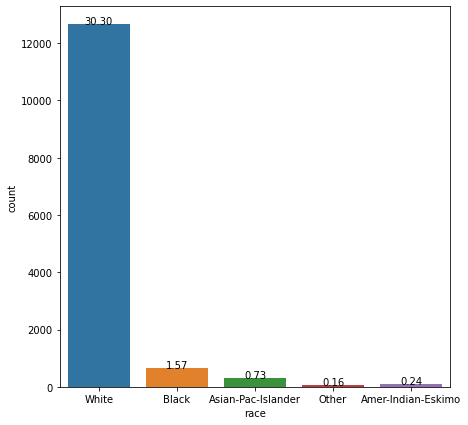

In [96]:
plt.figure(figsize=(7,7))
total = float(len(race4) )

ax = sns.countplot(x = "race" ,data=data[data["hours-per-week"]>40])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()